In [1]:
import warnings
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,mean_absolute_error
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.svm import SVR

from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer


from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Data/data_2.csv')

In [3]:
df

,Point,Trees,Shrubs,Peren_FG,bare_groun,Annual_FG,ppt,vpdmin,vpdmax,tmin,...,aspect,Runoff,Frosting_R,Flooding_F,BD_depth,AWS_50cm,AWS_25cm,AWS_150cm,AWS_100cm,Min_WTD
0,1,19,8,47,7,22,1003.760,8.6440,149.085,49.1187,...,180.0860,3,3,3,0.0,11.4900,5.7500,33.4300,22.9200,153.0
1,2,2,1,66,14,8,822.610,8.9776,138.599,46.5965,...,211.4610,1,3,3,0.0,11.5000,5.7500,33.3200,22.8200,153.0
2,3,3,1,69,2,14,849.481,9.4117,138.963,47.8117,...,186.5640,1,3,3,0.0,11.5000,5.7500,33.3200,22.8200,153.0
3,4,20,4,51,11,21,854.956,8.1519,135.181,45.4194,...,161.3930,1,3,3,0.0,11.5000,5.7500,33.3200,22.8200,153.0
4,5,18,11,50,9,20,849.242,9.2913,138.704,47.6300,...,121.3640,1,3,3,0.0,11.5000,5.7500,33.3200,22.8200,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,4793,13,8,57,15,23,789.471,12.5005,176.244,69.1463,...,297.1450,0,-1,0,0.0,2.1439,1.0640,6.4935,4.3117,0.0
4793,4794,36,7,43,1,12,778.307,8.1716,180.426,41.2986,...,25.7692,6,2,1,38.0,3.9900,2.5500,3.9900,3.9900,0.0
4794,4795,36,9,53,2,13,706.038,9.8153,175.318,46.5239,...,21.0057,6,2,1,38.0,3.9900,2.5500,3.9900,3.9900,0.0
4795,4796,33,4,43,3,11,713.786,13.5313,179.063,65.2216,...,68.3994,0,0,0,0.0,2.1172,1.1507,4.5539,3.3355,0.0


In [4]:
df = df[~(df.values.ravel() == -1).reshape(df.shape).any(1)]

In [5]:
df

,Point,Trees,Shrubs,Peren_FG,bare_groun,Annual_FG,ppt,vpdmin,vpdmax,tmin,...,aspect,Runoff,Frosting_R,Flooding_F,BD_depth,AWS_50cm,AWS_25cm,AWS_150cm,AWS_100cm,Min_WTD
0,1,19,8,47,7,22,1003.760,8.6440,149.085,49.1187,...,180.0860,3,3,3,0.0000,11.4900,5.7500,33.4300,22.9200,153.0
1,2,2,1,66,14,8,822.610,8.9776,138.599,46.5965,...,211.4610,1,3,3,0.0000,11.5000,5.7500,33.3200,22.8200,153.0
2,3,3,1,69,2,14,849.481,9.4117,138.963,47.8117,...,186.5640,1,3,3,0.0000,11.5000,5.7500,33.3200,22.8200,153.0
3,4,20,4,51,11,21,854.956,8.1519,135.181,45.4194,...,161.3930,1,3,3,0.0000,11.5000,5.7500,33.3200,22.8200,153.0
4,5,18,11,50,9,20,849.242,9.2913,138.704,47.6300,...,121.3640,1,3,3,0.0000,11.5000,5.7500,33.3200,22.8200,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,4791,51,7,43,3,10,828.338,8.7542,180.391,42.9977,...,269.6360,5,2,1,38.0000,5.1000,4.2500,5.1000,5.1000,0.0
4791,4792,17,7,67,1,10,868.329,8.8903,176.260,40.5698,...,301.8970,6,2,1,40.1869,4.1027,2.5825,4.4481,4.3668,0.0
4793,4794,36,7,43,1,12,778.307,8.1716,180.426,41.2986,...,25.7692,6,2,1,38.0000,3.9900,2.5500,3.9900,3.9900,0.0
4794,4795,36,9,53,2,13,706.038,9.8153,175.318,46.5239,...,21.0057,6,2,1,38.0000,3.9900,2.5500,3.9900,3.9900,0.0


In [6]:
df=df.sample(frac=1) #Shuffle the data

In [7]:
df['Trees']= (df['Trees'] > 40).astype(int)

In [8]:
y = df['Trees']

In [9]:
best_feature_mse = ['Shrubs', 'Peren_FG', 'bare_groun', 'Annual_FG', 'vpdmax', 'tmean',
       'slope', 'Runoff', 'Flooding_F', 'BD_depth']

In [10]:
best_df = df[best_feature_mse]

In [11]:
X = np.array(best_df)
y = np.array(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(3344, 10)

In [14]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Classifiers

## SVM Classifiers

### LinearSVC (Current optimal with current data processing)

In [31]:
LinSVC = LinearSVC(random_state=42)

In [32]:

%%time
param_grid = {
    'loss': ['hinge', 'squared_hinge'],
    'C' : [ 1 , 35, 50, 100, 500, 1000],
    'penalty': ['l1', 'l2'],
    'tol' : [0.1 , 0.01, 0.001, 0.0001],
    'max_iter' : [10, 35, 50, 100, 500, 1000, 5000, 10000],
}

LinSVC_cv = GridSearchCV(LinSVC, param_grid, scoring='accuracy', cv=5)

LinSVC_cv = LinSVC_cv.fit(X_train, y_train)

print("\nBest Score: %f" % LinSVC_cv.best_score_)

print("\nOptimal Hyperparameter Values: ")

for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, LinSVC_cv.best_params_[param_name]))


Best Score: 0.990131

Optimal Hyperparameter Values: 
C: 1
loss: 'hinge'
max_iter: 35
penalty: 'l2'
tol: 0.1
Wall time: 20.4 s


In [48]:

LinSVC= LinearSVC(random_state=42, C=LinSVC_cv.best_params_['C'], loss=LinSVC_cv.best_params_['loss'], max_iter=LinSVC_cv.best_params_['max_iter'], penalty= LinSVC_cv.best_params_['penalty'], tol=LinSVC_cv.best_params_['tol']).fit(X_train, y_train)
LinSVC.fit(X_train, y_train)

y_train_predicted = LinSVC.predict(X_train)


print("Training Accuracy: ", LinSVC.score(X_train, y_train))
y_test_predicted = LinSVC.predict(X_test)



print("Test Accuracy: ", LinSVC.score(X_test, y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Training Accuracy:  0.9895334928229665
Test Accuracy:  0.9916267942583732

Test Confusion Matrix:
[[813   4]
 [  3  16]]

Test Precision = 0.800000
Test Recall = 0.842105
Test F1 Score = 0.820513

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       817
           1       0.80      0.84      0.82        19

    accuracy                           0.99       836
   macro avg       0.90      0.92      0.91       836
weighted avg       0.99      0.99      0.99       836



In [49]:
data = [["Precision (test)", 1.00, precision_test, "N/A", 0.8981617647058824, 0.9918616310160429], 
        ["Recall (test)", 1.00, recall_test, "N/A", 0.9186046511627907, 0.9916267942583732],["f1-score (test)", 1.00, f1_test, LinSVC.score(X_test, y_test), 0.9081131157065021, 0.9917315793004708]]
pd.DataFrame(data, columns=["Metric", "Prediction of <=40% Trees", "Prediction of >40% Trees", "Test Accuracy", "Macro Avg", "Weigted Avg"])

,Metric,Prediction of <=40% Trees,Prediction of >40% Trees,Test Accuracy,Macro Avg,Weigted Avg
0,Precision (test),1.0,0.800000,N/A,0.898162,0.991862
1,Recall (test),1.0,0.842105,N/A,0.918605,0.991627
2,f1-score (test),1.0,0.820513,0.991627,0.908113,0.991732


# Computing support vectors

In [50]:
def compute_support_vectors(svm_clf, scaler, X, y):
    w_unscaled = svm_clf.coef_[0] / scaler.scale_


    b_scaled = svm_clf.intercept_
    #print("b_scaled: ", b_scaled)

    # Following term is subtracted from the b_scaled
    b_subtract = [(svm_clf.coef_[0]).T.dot(-scaler.mean_ / scaler.scale_)]
    #print("b_subtract: ", b_subtract)

    b_unscaled = np.array(b_scaled + b_subtract)
    #print("b_unscaled: ", b_unscaled)

    # Update the weight and intercept of the model with the unscaled weight parameters
    svm_clf.intercept_ = np.array([b_unscaled])

    svm_clf.coef_ = np.array([w_unscaled])
    
    
    # Now compute the support vectors.

    # The original class labels are 0 and 1.
    # We need to transform them to -1 and 1.
    t = y * 2 - 1


    # Note that the data points are classified according to the following rule:
    #  (t * (X.dot(w) + b) >= 1)
    # Thus the support vectors will satisfy: (t * (X.dot(w) + b) < 1)

    support_vectors_idx = (t * (X.dot(w_unscaled) + b_unscaled) < 1).ravel()

    svm_clf.support_vectors_ = X[support_vectors_idx]


    return svm_clf

In [53]:

def decision_boundary_support_vectors(svm_clf, X):
    
    xmin, xmax = X.min() - 1, X.max() + 1
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w1*x1 + w2*x2 + b = 0
    # => x2 = -(b + w1* x1)/w1
    x1 = np.linspace(xmin, xmax, 100)
    
    decision_boundary = -(b + w[0]*x1)/w[1]

    shifting_factor_for_margin = 1/w[1]
    upper_margin = decision_boundary + shifting_factor_for_margin
    lower_margin = decision_boundary - shifting_factor_for_margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=200, facecolors='g', label="Support Vectors")
    plt.plot(x1, decision_boundary, "k-", linewidth=2)
    plt.plot(x1, upper_margin, "k--", linewidth=2)
    plt.plot(x1, lower_margin, "k--", linewidth=2)

In [52]:
def decision_boundary_svc_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contour plot for the distance of all points from the hyperplane and the two margins
        plt.contour(x1, x2, y_decision, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], colors='black')
        
        
        #plt.pcolormesh(x1, x2, -y_decision, cmap=plt.cm.RdBu)
        
        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(colorBar==True):
        plt.colorbar()

In [61]:
svm_clf = compute_support_vectors(LinSVC, scaler, X_train, y_train)
svm_clf.support_vectors_

array([[-0.40933868, -0.12832676,  1.16123879, ...,  1.90521266,
        -0.47572371, -0.13130595],
       [-1.50294336,  1.97987605, -1.57628854, ..., -0.80413505,
        -0.47572371, -0.13130595],
       [-0.04480378,  0.92577464, -0.8919067 , ...,  1.22787574,
        -0.47572371, -0.13130595],
       ...,
       [ 0.68426601,  0.92577464,  0.99014333, ..., -0.12679812,
        -0.47572371, -0.13130595],
       [ 1.4133358 , -1.39324844,  0.3057615 , ..., -0.12679812,
        -0.47572371, -0.13130595],
       [ 1.4133358 , -0.86619774, -0.20752487, ...,  0.55053881,
        -0.47572371, -0.13130595]])

ValueError: x and y must have same first dimension, but have shapes (100,) and (1, 1, 1, 1, 100)

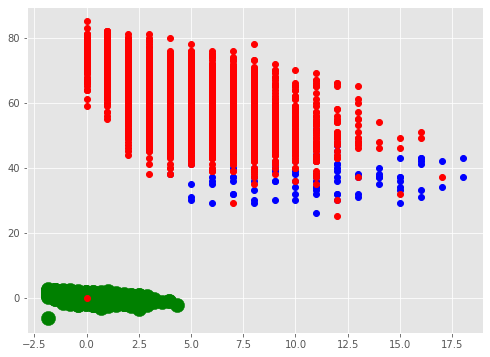

In [62]:
plt.figure(figsize=(18,6))
plt.subplot(121)


plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label="Class 0")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Class 1")

#decision_boundary_svc_class_colored(svm_clf, X_train, plotDistanceFromHyperplane=True, colorBar=False)

# We can plot the support vectors on the margin
decision_boundary_support_vectors(svm_clf, X_train)

plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.title("LinearSVC Classifier: $C = {}$".format(svm_clf.C), fontsize=16)
plt.axis([0.4, 1, 4, 8])
plt.show()